In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
pd.set_option('max_rows',1000)
import os
from glob import iglob

In [5]:
# Load all structural p-values across both analyses
df = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/specialK_analysis_2016-06-02/cosmic/recurrence_K_summary.txt",delimiter='\t')

In [6]:
print "Number of structures evaluated:"
print len(df)
print "Number of variants evluated:"
print "%.0f"%np.sum(df["N"])

from qvalue import estimate
THRESH = 0.1

df.ix[~df[ "Kp"].isnull(), "Kq"], K_lam, K_pi = estimate(df.ix[~df[ "Kp"].isnull(), "Kp"].values)
df.ix[~df["wKp"].isnull(),"wKq"],wK_lam,wK_pi = estimate(df.ix[~df["wKp"].isnull(),"wKp"].values)

print "\nProteins passing an FDR of %.0f%% for the unweighted analysis"%(THRESH*100)
print "Significant:   %4d"%( df['Kq']<THRESH).sum()
print "    Clustered: %4d"%((df['Kq']<THRESH) & (df["Kz"]>0)).sum()
print "    Dispersed: %4d"%((df['Kq']<THRESH) & (df["Kz"]<0)).sum()

print "\nProteins passing an FDR of %.0f%% for the weighted analysis"%(THRESH*100)
print "Significant:   %4d"%(df["wKq"]<THRESH).sum()
print "    Clustered: %4d"%((df["wKq"]<THRESH) & (df.ix[~df["wKp"].isnull(),"wKz"]>0)).sum()
print "    Dispersed: %4d"%((df["wKq"]<THRESH) & (df.ix[~df["wKp"].isnull(),"wKz"]<0)).sum()

Number of structures evaluated:
4557
Number of variants evluated:
114884

Proteins passing an FDR of 10% for the unweighted analysis
Significant:     13
    Clustered:   13
    Dispersed:    0

Proteins passing an FDR of 10% for the weighted analysis
Significant:      0
    Clustered:    0
    Dispersed:    0


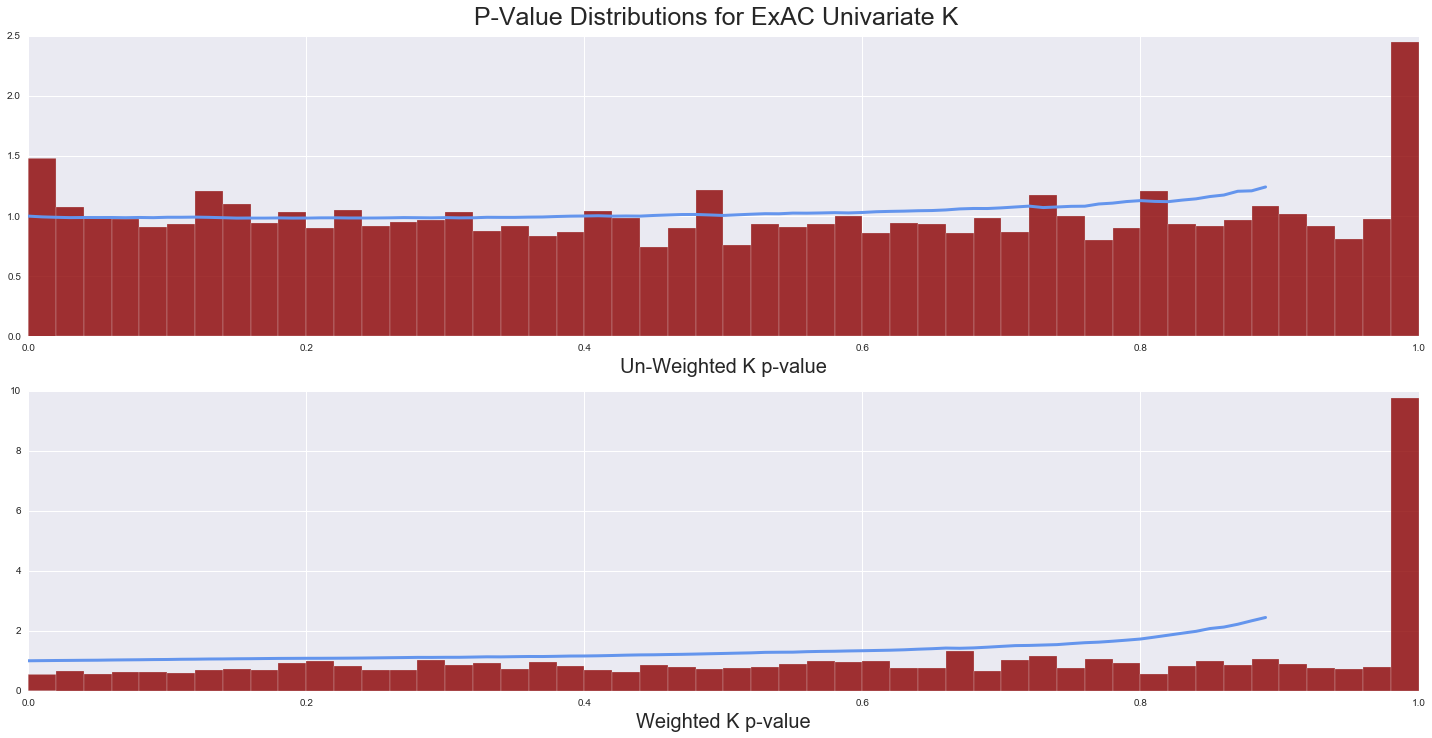

In [7]:
# P-Value Distributions
fig,ax = plt.subplots(2,1,figsize=(20,10))
plt.suptitle("P-Value Distributions for ExAC Univariate K",fontsize=25,y=1.02)
ax[0].set_xlabel("Un-Weighted K p-value",fontsize=20)
# ax[0].hist(df["Kzp"],bins=np.arange(0,1.02,0.02),color="darkblue",normed=True)
ax[0].hist(df["Kp"],bins=np.arange(0,1.02,0.02),color="darkred",alpha=0.8,normed=True)
ax[0].plot(K_lam,K_pi,lw=3,c='cornflowerblue')
ax[1].set_xlabel("Weighted K p-value",fontsize=20)
# ax[1].hist(df["wKzp"],bins=np.arange(0,1.02,0.02),color="darkblue",normed=True)
ax[1].hist(df["wKp"],bins=np.arange(0,1.02,0.02),color="darkred",alpha=0.8,normed=True)
ax[1].plot(wK_lam,wK_pi,lw=3,c='cornflowerblue')
plt.tight_layout()
plt.show()

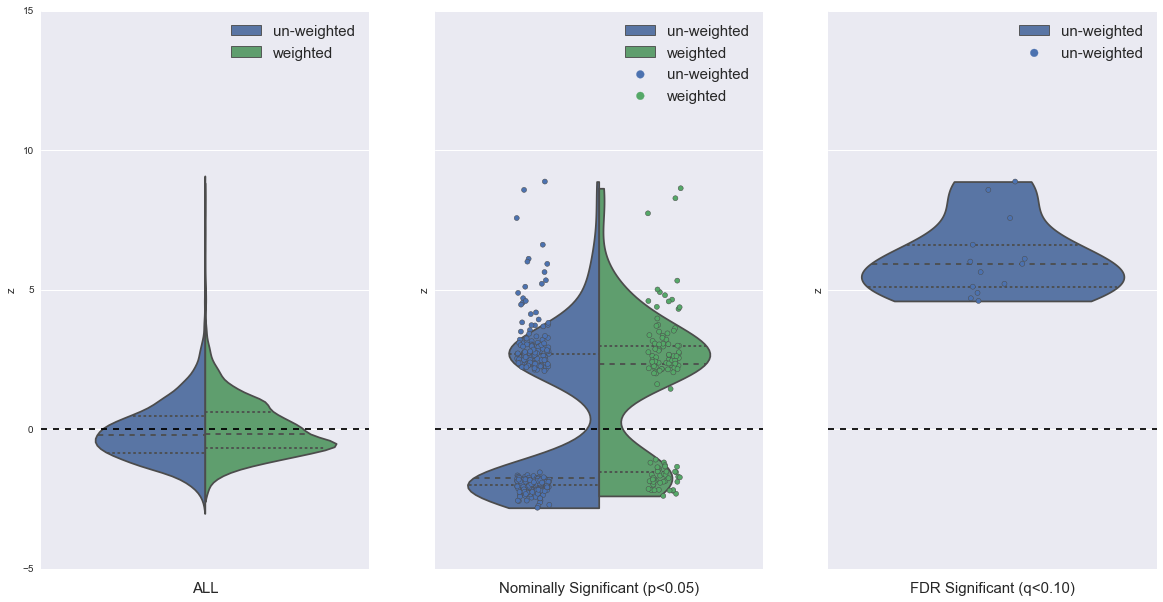

In [8]:
dfu = pd.DataFrame(df[["Kp","Kz"]].values,columns=["p","z"])
dfu['q'] = estimate(dfu["p"].values)[0]
dfu["w"] = "un-weighted"
dfw = pd.DataFrame(df[["wKp","wKz"]].values,columns=["p","z"])
dfw['w'] = "weighted"
dfw.ix[~dfw['p'].isnull(),'q'] = estimate(dfw.ix[~dfw['p'].isnull(),"p"].values)[0]
dfv = pd.concat((dfu,dfw))
dfv['dummy'] = ""

fig,ax = plt.subplots(1,3,figsize=(20,10),sharey=True)
sns.violinplot(x='dummy',y="z",hue='w',data=dfv,ax=ax[0],cut=1,orient='v',split=True,inner='quart')
dfv1 = dfv[dfv["p"]<0.05]
if not dfv1.empty:
    split = (dfv1["w"]=="weighted").sum() > 0
    sns.violinplot(x='dummy',y="z",hue='w',data=dfv1,ax=ax[1],orient='v',split=split,cut=0,inner='quart')
    sns.stripplot( x='dummy',y="z",hue='w',data=dfv1,ax=ax[1],orient='v',split=True,jitter=True,lw=0.5)
dfv1 = dfv[dfv["q"]<THRESH]
if not dfv1.empty:
    split = (dfv1["w"]=="weighted").sum() > 0
    sns.violinplot(x='dummy',y="z",hue='w',data=dfv1,ax=ax[2],orient='v',split=split,cut=0,inner='quart')
    sns.stripplot( x='dummy',y="z",hue='w',data=dfv1,ax=ax[2],orient='v',split=True,jitter=True,lw=0.5)
ax[0].set_xlabel("ALL",fontsize=15)
ax[1].set_xlabel("Nominally Significant (p<0.05)",fontsize=15)
ax[2].set_xlabel("FDR Significant (q<%.2f)"%THRESH,fontsize=15)
ax[0].legend(fontsize=15)
ax[1].legend(fontsize=15)
ax[2].legend(fontsize=15)
plt.ylim([-5,15])
ax[0].axhline(0.,ls='dashed',c='black')
ax[1].axhline(0.,ls='dashed',c='black')
ax[2].axhline(0.,ls='dashed',c='black')
plt.show()

In [9]:
print "Un-Weighted: FDR-Significant Proteins"
print df.ix[df["Kq"]<0.1,["structid","chain","Kz","Kp","Kq"]]

print "\nWeighted: FDR-Significant Proteins"
print df.ix[df["wKq"]<0.1,["structid","chain","wKz","wKp","wKq"]]

Un-Weighted: FDR-Significant Proteins
     structid chain        Kz       Kp        Kq
585      4NM6     A  8.880209  0.00002  0.013020
597      1D5R     A  4.697601  0.00004  0.018228
643      3GT8     C  5.929876  0.00002  0.013020
644      2RD0     A  5.635180  0.00002  0.013020
650      2Q7Z     A  7.572514  0.00002  0.013020
1848     4LEV     B  4.889275  0.00016  0.056086
2456     2WTK     C  4.600847  0.00016  0.056086
3272     2Y1M     F  6.615866  0.00002  0.013020
3302     2SHP     B  8.580853  0.00002  0.013020
3376     2NPP     A  5.216309  0.00014  0.056086
4183     2OVQ     B  6.113368  0.00004  0.018228
4203     4BHW     B  5.110689  0.00004  0.018228
4542     1MFV     A  6.009778  0.00002  0.013020

Weighted: FDR-Significant Proteins
Empty DataFrame
Columns: [structid, chain, wKz, wKp, wKq]
Index: []


In [10]:
print df.columns

Index([u'structid', u'chain', u'R', u'N', u'P', u'T', u'K', u'Kp', u'Kz',
       u'Kzp', u'wP', u'wT', u'wK', u'wKp', u'wKz', u'wKzp', u'Kq', u'wKq'],
      dtype='object')


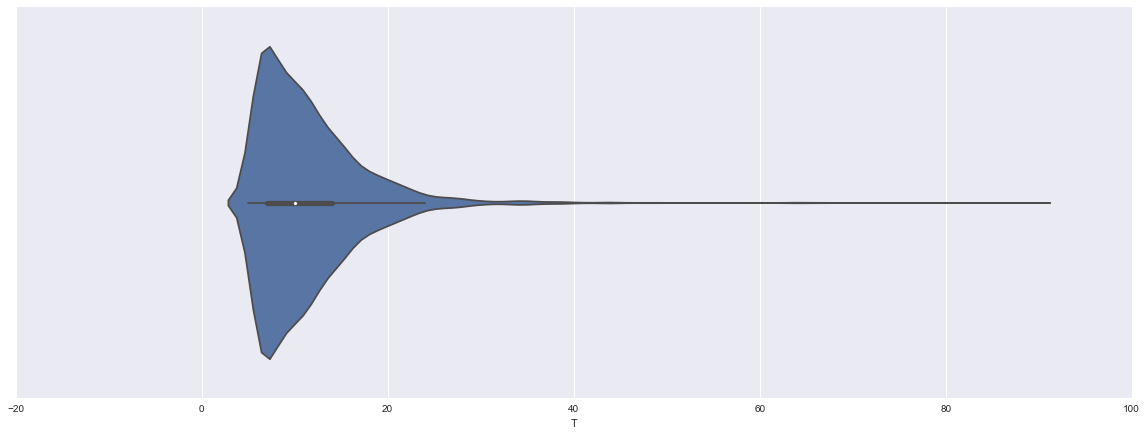

In [11]:
plt.figure(figsize=(20,7))
sns.violinplot(df["T"],bins=100)
plt.show()

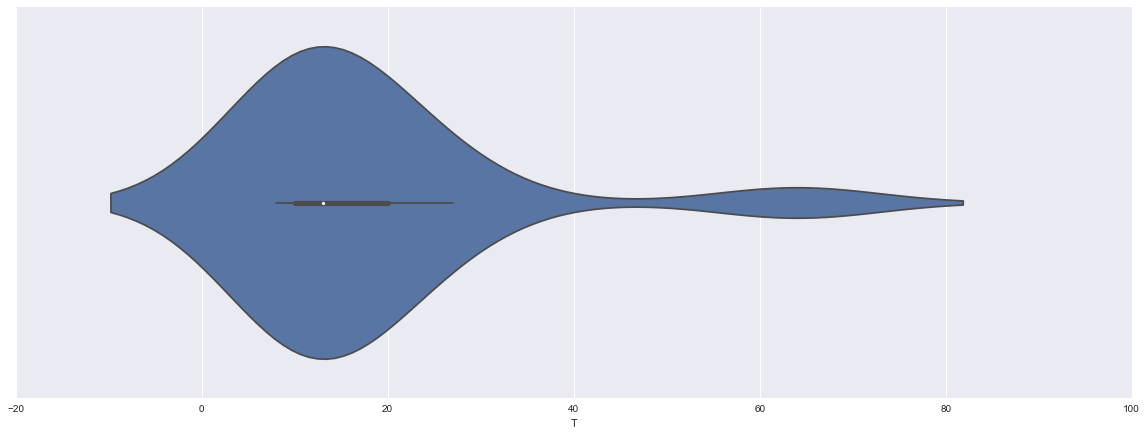

In [12]:
plt.figure(figsize=(20,7))
sns.violinplot(df.ix[df["Kq"]<0.1,"T"],bins=100)
plt.show()

In [13]:
# Generate a list of significant structures for overlap with ClinVar (see the end of the univariate ClinVar notebook)
sig = list(df.ix[(df['Kq']<0.1) & (df['Kz']>0),'structid'].values)
sig.extend(df.ix[(df['wKq']<0.1) & (df['wKz']>0),'structid'].values)
print list(set(sig))

['2SHP', '2OVQ', '4NM6', '4BHW', '1D5R', '2WTK', '2RD0', '4LEV', '3GT8', '2Q7Z', '2NPP', '2Y1M', '1MFV']
